In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline
import json

In [2]:
df = pd.read_json('ultimate_data_challenge.json')

In [3]:
df.head(10)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
5,Winterfell,2,2014-01-09,3.5,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0
6,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,Android,0.0,False,100.0,3.95,4.0
7,Winterfell,2,2014-01-28,5.0,1.00,2014-01-29,iPhone,0.0,False,100.0,2.04,5.0
8,Winterfell,2,2014-01-21,4.5,1.00,2014-02-01,Android,0.0,False,100.0,4.36,5.0
9,Winterfell,1,2014-01-03,NaN,1.00,2014-01-05,Android,0.0,False,0.0,2.37,5.0


In [4]:
df.shape

(50000, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [6]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [7]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


### Converting datatype of date column into timestamp
* strings can’t be used for time calculations, but timestamps can.Can’t calculate differences,Can’t sort chronologically (reliably)
* Can’t extract year/month/day,Models can’t use it


In [8]:
df['signup_date'] =  pd.to_datetime(df['signup_date'])
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

### there is no data pull date mention in data so assuming last trip max date 

In [9]:
data_pull_date = df['last_trip_date'].max()
data_pull_date 

Timestamp('2014-07-01 00:00:00')

In [10]:
diff_data_pull_last_date = (df['last_trip_date'].max() - df['last_trip_date'])

In [11]:
diff_data_pull_last_date.head()

0    14 days
1    57 days
2   175 days
3     2 days
4   108 days
Name: last_trip_date, dtype: timedelta64[ns]

In [12]:
(diff_data_pull_last_date).dt.days

0         14
1         57
2        175
3          2
4        108
        ... 
49995     26
49996    157
49997     40
49998    167
49999     72
Name: last_trip_date, Length: 50000, dtype: int64

In [13]:
df['retained'] = (diff_data_pull_last_date.dt.days <=30).astype(int)

In [14]:
df['retained'].value_counts(normalize = True)

retained
0    0.62392
1    0.37608
Name: proportion, dtype: float64

### from the data we can conclude that only 37% customers are retained by Ultimate

## Distribution of numerical feature 

In [15]:
df.columns

Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'retained'],
      dtype='object')

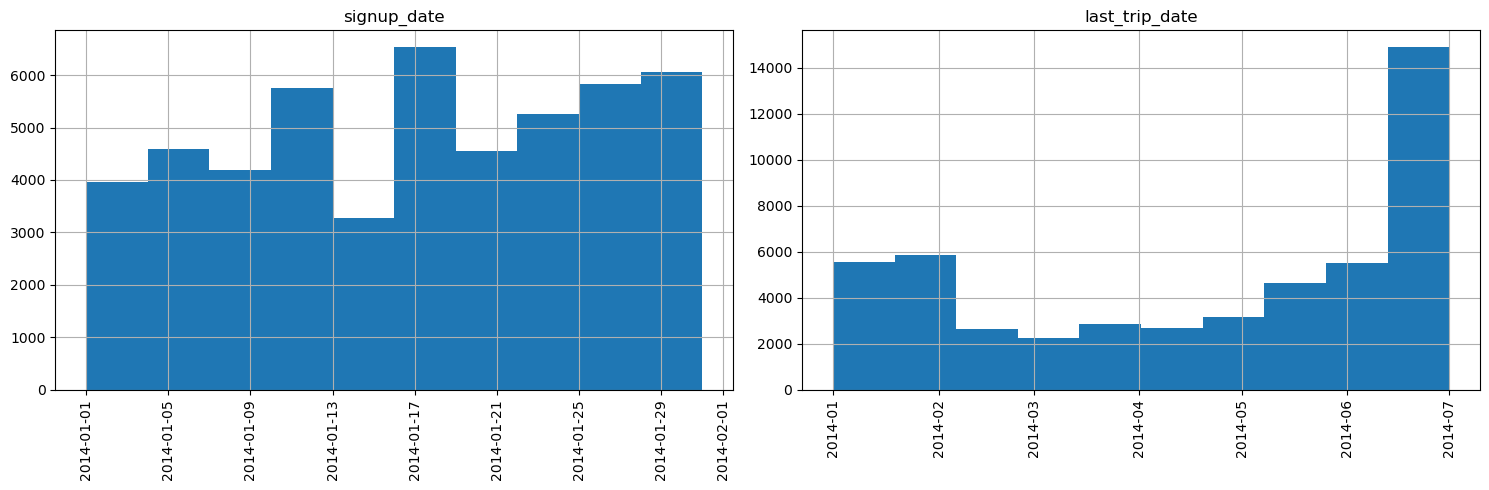

In [16]:
columns1 = ['signup_date','last_trip_date']
axes = df[columns1].hist(figsize=(15,5))
for ax in axes.flatten():
    ax.tick_params(axis="x", rotation=90)
plt.tight_layout()
plt.show()

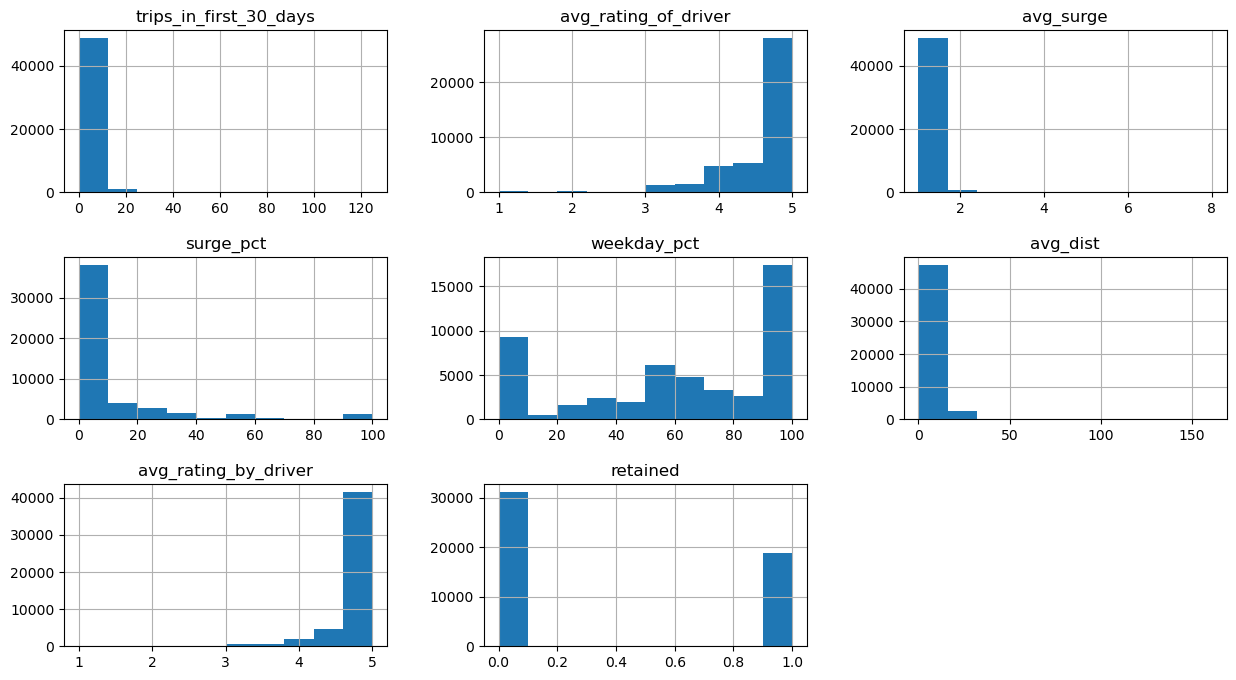

In [18]:
columns = ['city', 'trips_in_first_30_days', 'avg_rating_of_driver','avg_surge', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist','avg_rating_by_driver', 'retained']
df[columns].hist(figsize=(15,8))
plt.subplots_adjust(hspace=0.4)
plt.show()

* From the histograms, trips_in_first_30_days, avg_surge, surge_pct, and avg_dist show strong right-skewness, indicating that most users have low values while a few users exhibit extremely high values, resulting in outliers.

* The total_days feature shows a mixed distribution, with a high concentration of users active for fewer than 10 days, followed by a gradual increase in user count between 50 and 150 days, and a slight decline beyond that range.

* Both avg_rating_of_driver and avg_rating_by_driver are left-skewed, indicating that the majority of users have high ratings, with relatively few low-rating outliers.

# Data cleaning 

In [19]:
df.columns

Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'retained'],
      dtype='object')

In [20]:
df.duplicated().sum()

np.int64(8)

In [21]:
# sns.catplot(x="phone",y="total_days",data=df)
# plt.show()

In [22]:
df.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
retained                     0
dtype: int64

### filled missing value by using median for numerical column and mode for categorical column

In [23]:
df['avg_rating_by_driver'] = df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].median())

In [24]:
df['avg_rating_of_driver'] = df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].median())

In [25]:
df['phone'] = df['phone'].fillna(df['phone'].mode()[0])

In [26]:
df.isnull().sum()

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
retained                  0
dtype: int64

In [27]:
df.duplicated().sum()

np.int64(8)

In [28]:
df_duplicate = df.duplicated().sum()
df_duplicate

np.int64(8)

In [29]:
df[df.duplicated(keep = False)].head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
116,Winterfell,1,2014-01-10,5.0,1.0,2014-01-11,Android,0.0,False,100.0,0.00,5.0,0
332,Astapor,1,2014-01-18,5.0,1.0,2014-01-19,iPhone,0.0,True,0.0,6.25,5.0,0
2608,Astapor,1,2014-01-18,5.0,1.0,2014-01-19,iPhone,0.0,True,0.0,6.25,5.0,0
3134,Astapor,1,2014-01-20,5.0,1.0,2014-01-20,iPhone,0.0,False,100.0,3.06,5.0,0
5958,Winterfell,1,2014-01-18,4.9,1.0,2014-01-19,Android,0.0,False,0.0,0.01,5.0,0


* droping off the duplicates because No ride ID,No trip timestamp per ride,No pickup/drop info

In [30]:
df = df.drop_duplicates(keep ='first')

In [31]:
df.duplicated().sum()

np.int64(0)

### Categorical value cleanup

In [32]:
df["phone"].value_counts()

phone
iPhone     34974
Android    15018
Name: count, dtype: int64

In [33]:
df["phone"] = df["phone"].str.lower()

C:\Users\patid\AppData\Local\Temp\ipykernel_51180\3368336052.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["phone"] = df["phone"].str.lower()


In [34]:
df["phone"].value_counts()

phone
iphone     34974
android    15018
Name: count, dtype: int64

In [61]:
df["ultimate_black_user"].value_counts(normalize=True)

ultimate_black_user
False    0.62292
True     0.37708
Name: proportion, dtype: float64

In [35]:
df.describe()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,retained
count,49992.000000,49992,49992.000000,49992.000000,49992,49992.000000,49992.000000,49992.00000,49992.000000,49992.000000
mean,2.278405,2014-01-16 13:04:52.078732800,4.649988,1.074776,2014-04-19 08:23:49.284685568,8.850952,60.929833,5.79726,4.779015,0.376140
min,0.000000,2014-01-01 00:00:00,1.000000,1.000000,2014-01-01 00:00:00,0.000000,0.000000,0.00000,1.000000,0.000000
25%,0.000000,2014-01-09 00:00:00,4.500000,1.000000,2014-02-14 00:00:00,0.000000,33.300000,2.42000,4.700000,0.000000
50%,1.000000,2014-01-17 00:00:00,4.900000,1.000000,2014-05-08 00:00:00,0.000000,66.700000,3.88000,5.000000,0.000000
75%,3.000000,2014-01-24 00:00:00,5.000000,1.050000,2014-06-18 00:00:00,8.600000,100.000000,6.94000,5.000000,1.000000
max,125.000000,2014-01-31 00:00:00,5.000000,8.000000,2014-07-01 00:00:00,100.000000,100.000000,160.96000,5.000000,1.000000
std,3.792953,NaN,0.575633,0.222352,NaN,19.960094,37.078229,5.70761,0.446001,0.484421


## EDA

In [36]:
df_num = df.select_dtypes(include = ['number'])

In [37]:
df_num.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,4,4.7,1.10,15.4,46.2,3.67,5.0,1
1,0,5.0,1.00,0.0,50.0,8.26,5.0,0
2,3,4.3,1.00,0.0,100.0,0.77,5.0,0
3,9,4.6,1.14,20.0,80.0,2.36,4.9,1
4,14,4.4,1.19,11.8,82.4,3.13,4.9,0


In [38]:
df_cat = df.select_dtypes(include =['category','object','bool'])

In [39]:
df_cat.head()

,city,phone,ultimate_black_user
0,King's Landing,iphone,True
1,Astapor,android,False
2,Astapor,iphone,False
3,King's Landing,iphone,True
4,Winterfell,android,False


### Numerical feature analysis 

In [58]:
for i in df_num.columns:
    print(i,':',df_num[i].nunique())

trips_in_first_30_days : 59
avg_rating_of_driver : 37
avg_surge : 115
surge_pct : 367
weekday_pct : 666
avg_dist : 2908
avg_rating_by_driver : 27
retained : 2


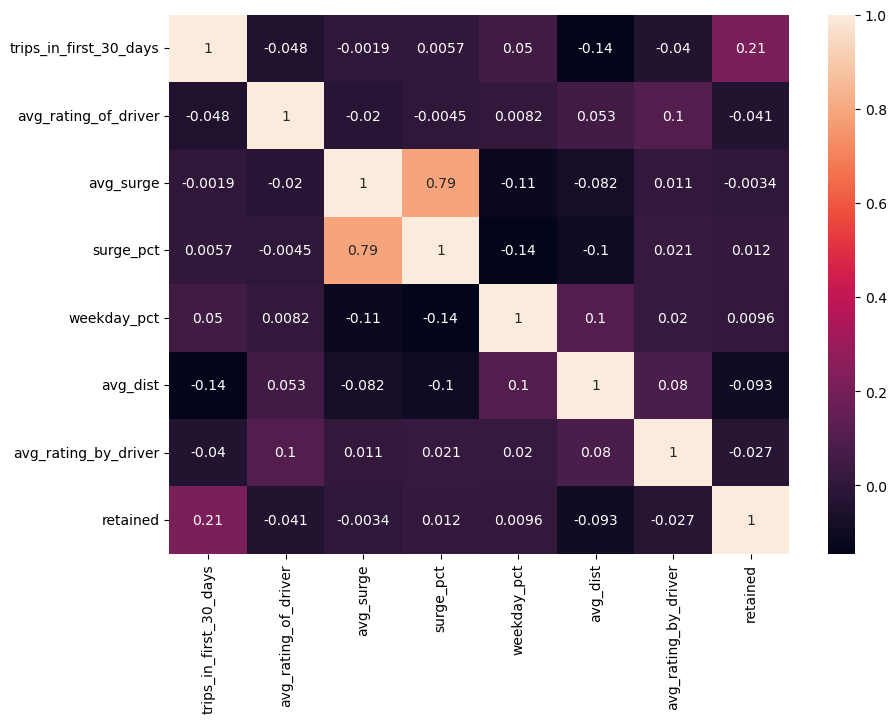

In [40]:
plt.figure(figsize =(10,7))
sns.heatmap(df_num.corr(), annot =True)
plt.show()

surge_pt and avg_surge is highly corelated with each other so we need to drop one feature for linear modelling because it represent multicolinearity.

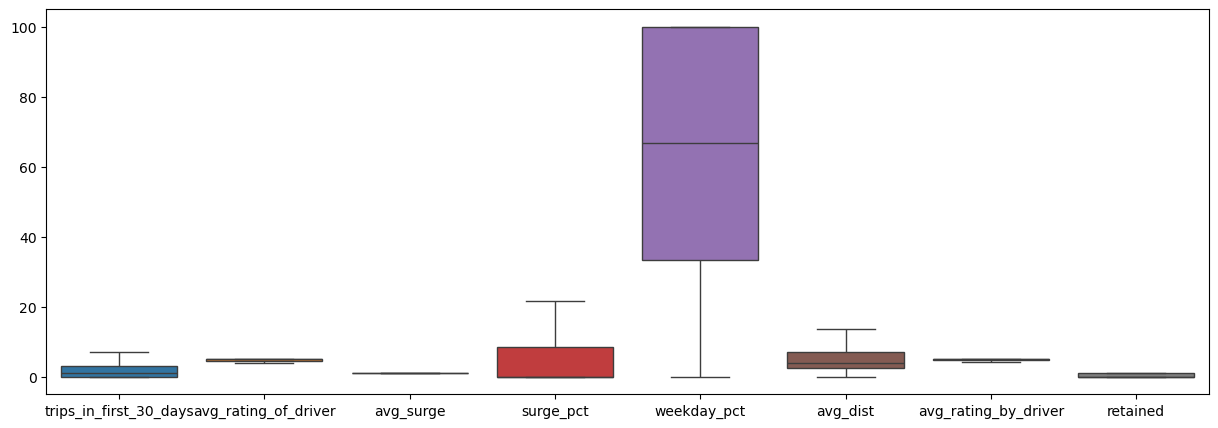

In [47]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df_num, showfliers = False)
plt.show()

In [50]:
df_num.columns

Index(['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver',
       'retained'],
      dtype='object')

In [ ]:
column1

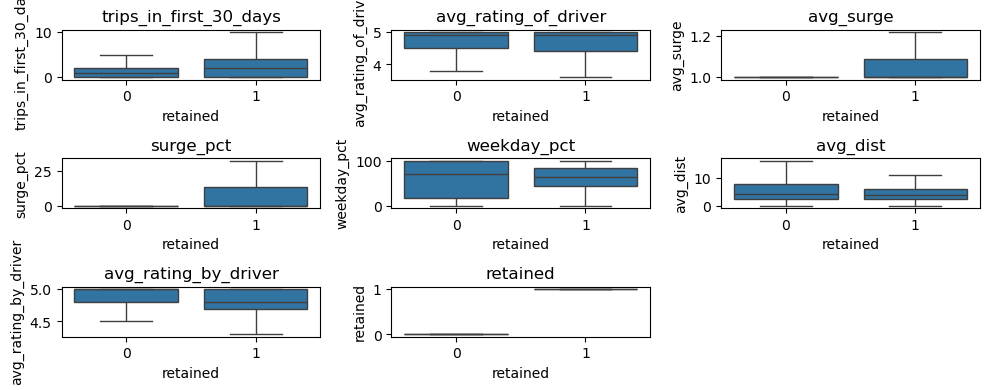

In [51]:
plt.figure(figsize=(10,10))

for i, col in enumerate(df_num.columns, 1):
    plt.subplot(len(df_num.columns), 3, i)
    sns.boxplot(x="retained", y=col, data=df, showfliers = False)
    plt.title(col)

plt.tight_layout()
plt.show()

* Trips in first 30 days: Retained users clearly take more trips early, making this a strong driver of retention.
* Avg surge & surge_pct: Retained users experience slightly higher surge and surge frequency, suggesting higher engagement during peak demand.
* Weekday_pct: Retained users show a more consistent weekday usage pattern or  A tighter distribution indicates consistent user behavior.
* Avg distance: Distributions overlap heavily, weak or no impact on retention.
* Avg rating of driver / by driver: Ratings are similar across both classes,not a strong differentiator.
* Overall: Behavioral engagement features (early usage, frequency, consistency) separate retained vs non-retained users much better.

In [52]:
df_num.corr()['retained']

trips_in_first_30_days    0.210433
avg_rating_of_driver     -0.041017
avg_surge                -0.003375
surge_pct                 0.011742
weekday_pct               0.009617
avg_dist                 -0.092847
avg_rating_by_driver     -0.027488
retained                  1.000000
Name: retained, dtype: float64

Trips in the first 30 days shows the strongest linear association with retention,Low correlation does NOT mean low importance.

### Categorical feature analysis 

In [53]:
df_cat

,city,phone,ultimate_black_user
0,King's Landing,iphone,True
1,Astapor,android,False
2,Astapor,iphone,False
3,King's Landing,iphone,True
4,Winterfell,android,False
...,...,...,...
49995,King's Landing,iphone,False
49996,Astapor,iphone,False
49997,Winterfell,android,True
49998,Astapor,iphone,False


In [59]:
for i in df_cat.columns:
    print(i,':',df_cat[i].nunique())

city : 3
phone : 2
ultimate_black_user : 2


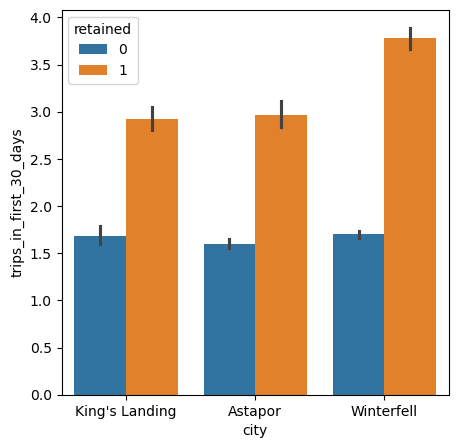

In [72]:
plt.figure(figsize =(5,5))
sns.barplot(data = df, x='city', y='trips_in_first_30_days', hue = 'retained')
plt.show()

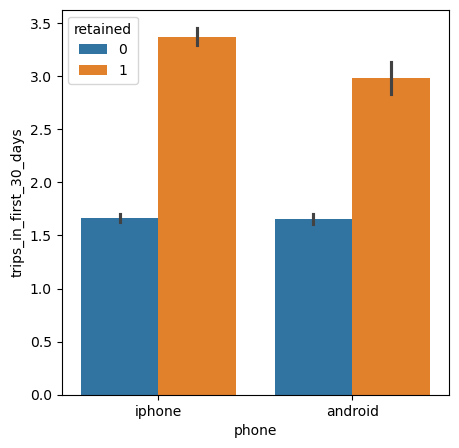

In [73]:
plt.figure(figsize =(5,5))
sns.barplot(data = df, x='phone', y='trips_in_first_30_days', hue ='retained')
plt.show()

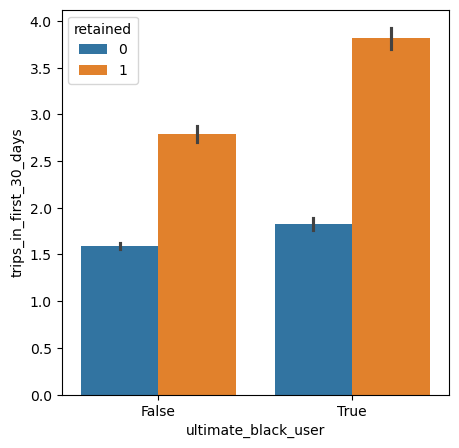

In [74]:
plt.figure(figsize =(5,5))
sns.barplot(data = df, x='ultimate_black_user', y='trips_in_first_30_days', hue ='retained')
plt.show()

In [76]:
df.columns

Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'retained'],
      dtype='object')

In [80]:
df.to_csv('ultimate_home_challenge.csv',index=False)

In [82]:
df.groupby(pd.qcut(df['trips_in_first_30_days'], 5, duplicates='drop'))['retained'].mean()

C:\Users\patid\AppData\Local\Temp\ipykernel_51180\1219857666.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(pd.qcut(df['trips_in_first_30_days'], 5, duplicates='drop'))['retained'].mean()


trips_in_first_30_days
(-0.001, 1.0]    0.295185
(1.0, 2.0]       0.370576
(2.0, 3.0]       0.446938
(3.0, 125.0]     0.608140
Name: retained, dtype: float64

Users who complete 4+ trips in the first 30 days are more than 2× as likely to be retained compared to users with ≤1 trip.

In [84]:
df.groupby(pd.qcut(df['weekday_pct'],5,duplicates='drop'))['retained'].mean()

C:\Users\patid\AppData\Local\Temp\ipykernel_51180\874344662.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(pd.qcut(df['weekday_pct'],5,duplicates='drop'))['retained'].mean()


weekday_pct
(-0.001, 20.0]    0.204859
(20.0, 52.6]      0.485688
(52.6, 80.0]      0.624279
(80.0, 100.0]     0.273908
Name: retained, dtype: float64

Retention shows an inverted-U relationship with weekday usage, peaking for users with ~50–80% weekday trips and dropping for users with very low or extremely high weekday dependence.